Zadaci za 11 bodova:

Genetskim algoritmom riješiti neki složeniji problem koji će zahtijevati pomniju razradu osnovnih
mehanizama (križanje, mutacije, itd.). Poželjno je napraviti više različitih modela (mehanizama) i
usporediti rezultate.

In [353]:
import scipy as np
import scipy as sp
import sklearn
import pylab
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import copy

Rješavam problem najkraćeg puta između 50 gradova prikazanih na grafu tako da putnik u svaki grad smije doći samo 1. Put može početi iz bilo kojeg grada.

In [321]:
#inicijaliziranje parametara genetskog algoritma
dotCount = 50
popCount = 50
MAXITER = 100
mutProb = popCount/10

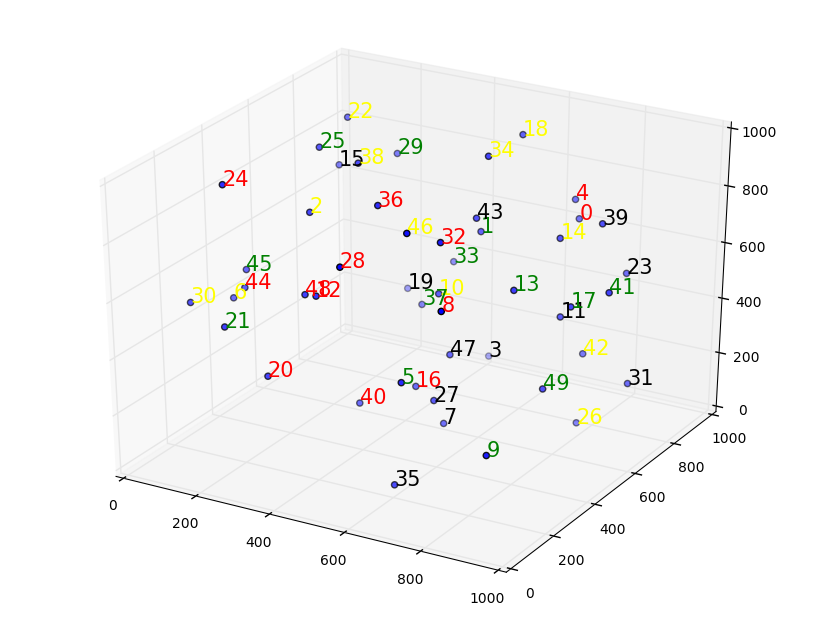

In [400]:
np.random.seed(1221)

#citiesX = np.random.randint(low = 1, high=50, size=(32, 2), dtype='l')
citiesX = np.random.randint(low = 50, high=950, size=dotCount, dtype='l')
citiesY = np.random.randint(low = 50, high=950, size=dotCount, dtype='l')
citiesZ = np.random.randint(low = 50, high=950, size=dotCount, dtype='l')

n=range(1, dotCount+1)
#fig, ax = plt.subplots(figsize=(8,6))
#ax.scatter(citiesX, citiesY)

#for i, txt in enumerate(n):
#    ax.annotate(txt, (citiesX[i],citiesY[i]))
#plt.show()

fig = pylab.figure(figsize=(8,6))
ax = Axes3D(fig)

ax.scatter(citiesX, citiesY, citiesZ)
colors = ['red', 'green', 'yellow', 'black']
for i, txt in enumerate(n):
    ax.text(citiesX[i], citiesY[i], citiesZ[i],  '%s' % (str(i)), size=15, zorder=1,  color=colors[i%4]) 
plt.show()

In [487]:
np.random.seed()

In [488]:
def dist(indexes):
    dist = 0
    for i in range(0, len(indexes)-1):
        a = np.array((citiesX[indexes[i]], citiesY[indexes[i]], citiesZ[indexes[i]]))
        b = np.array((citiesX[indexes[i+1]], citiesY[indexes[i+1]], citiesZ[indexes[i+1]]))
        dist = dist +  np.linalg.norm(a-b)
    return dist

def fitness(indexes):
    d = dist(indexes)
    return fitnessFunction(d)

def fitnessFunction(d):
    return 1/(3.14**(d*1.0/25000))**6*100

def bestUnit(population):
    best = population[0]
    bestFit = dist(best)
    for unit in population:
        currentFit = dist(unit)
        if(currentFit < bestFit):
            bestFit = currentFit
            best = unit
    return best

def switch(unit1, unit2, i):
    t = unit1[i]
    unit1[i] = unit2[i]
    unit2[i] = t
    return (unit1, unit2)

def mutateOne(unit):
    unit = copy.deepcopy(unit)
    i = np.random.randint(low = 0, high = dotCount)
    j = np.random.randint(low = 0, high = dotCount)
    while(i == j):
        j = np.random.randint(low = 0, high = dotCount)
    t = unit[i]
    unit[i] = unit[j]
    unit[j] = t
    return unit

def mutateTwo(unit):
    return mutateOne(mutateOne(unit))

def crossOnce(unit1, unit2):
    new1 = copy.deepcopy(unit1)
    new2 = copy.deepcopy(unit2)
    
    i = np.random.randint(low = 0, high = dotCount)
    j = np.random.randint(low = i, high = dotCount)
    for k in range(i, j):
        new1 = switchInside(new1, unit2[k], k)
        new2 = switchInside(new2, unit1[k], k)
    return (new1, new2)

def switchInside(unit, element, k):
    for i in range(0, len(unit)):
        if(unit[i] == element):
            unit[i] = unit[k]
            unit[k] = element
            return unit
    
def tournamentSelection(population):
    selected = []
    for i in range(0, popCount/2):
        i = np.random.randint(low = 0, high = len(population))
        j = np.random.randint(low = 0, high = len(population))
        while(i == j):
            j = np.random.randint(low = 0, high = len(population))
        unit1 = bestUnit([population[i], population[j]])
        
        i = np.random.randint(low = 0, high = len(population))
        j = np.random.randint(low = 0, high = len(population))
        while(i == j):
            j = np.random.randint(low = 0, high = len(population))
        unit2 = bestUnit([population[i], population[j]])
        
        selected.append((unit1, unit2))
    return selected

def rouletteSelection(population):
    selected = []
    vals = []
    vals.append(0)
    total = 0
    for i in range(0, popCount):
        total = total+fitness(population[i])
        vals.append(total)
    for i in range(0, popCount/2):
        r1 = np.random.ranf()*total
        r2 = np.random.ranf()*total
        for j in range(0, popCount):
            if(r1>=vals[j] and r1 <= vals[j+1]):
                unit1 = population[j]
            if(r2>=vals[j] and r2 <= vals[j+1]):
                unit2 = population[j]
        selected.append((unit1, unit2))
    return selected

def averageFitness(population):
    fit = 0
    for unit in population:
        fit = fit + fitness(unit)
    return fit*1.0/len(population)

def averageFitnessSelection(selected):
    fit = 0
    for pair in selected:
        fit = fit + fitness(pair[0])
        fit = fit + fitness(pair[1])
    return fit*1.0/len(selected)/2

def crossSelected(selected):
    population = []
    for i in range(0, len(selected)):
        pair = selected[i]
        u1, u2 = crossOnce(pair[0], pair[1])
        population.append(u1)
        population.append(u1)
    return population

def mutatePopulation(population, mutationMethod):
    for i in range(0, len(population)):
        r = np.random.randint(low = 1, high = mutProb)
        if(r == 1):
            population[i] = mutationMethod(population[i])
    return population

In [489]:
#inicijaliziranje početne populacije
pop = []
for i in range(0, popCount):
    pop.append(np.random.permutation(dotCount))

#usporedba fitnessa na početnoj populaciji te uzorcima ruleta i turnira
print averageFitness(pop)
print averageFitnessSelection(rouletteSelection(pop))
print averageFitnessSelection(tournamentSelection(pop))

0.0393463782711
0.0489774213492
0.0497724786878


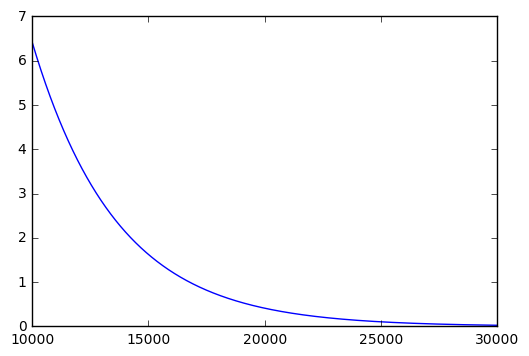

In [490]:
#funkcija fitnessa, očekivane udaljenosti su između 10 i 30 tisuća
x = range(10000, 30000)
y = []
for i in x:
    y.append(fitnessFunction(i))
plt.plot(x, y)
plt.show()

In [491]:
def geneticIterations(pop, selectionMethod):
    elite = bestUnit(pop)
    bestDist = dist(elite)
    for i in range(0, 1000):
        sel = selectionMethod(pop)
        pop = crossSelected(sel)
        pop = mutatePopulation(pop, mutateOne)
        
        newBest = bestUnit(pop)
        newDist = dist(newBest)
        if(newDist < bestDist):
            elite = newBest
            bestDist = newDist
    return elite

rouPop = copy.deepcopy(pop)
tourPop = copy.deepcopy(pop)

initBest = bestUnit(pop) 
print "Najbolja udaljenost u početnoj populaciji: " + str(dist(initBest))

Najbolja udaljenost u početnoj populaciji: 26147.6334661


In [492]:
rouBest = geneticIterations(rouPop, rouletteSelection)
print "Najbolja udaljenost nakon ruletnog odabira: " + str(dist(rouBest))

Najbolja udaljenost nakon ruletnog odabira: 15255.8817778


In [493]:
tourBest = geneticIterations(tourPop, tournamentSelection)
print "Najbolja udaljenost nakon turnirskog odabira: " + str(dist(tourBest))

Najbolja udaljenost nakon turnirskog odabira: 12667.2285297


Sljedeća slika prikazuje put dobiven ruletnim odabirom:

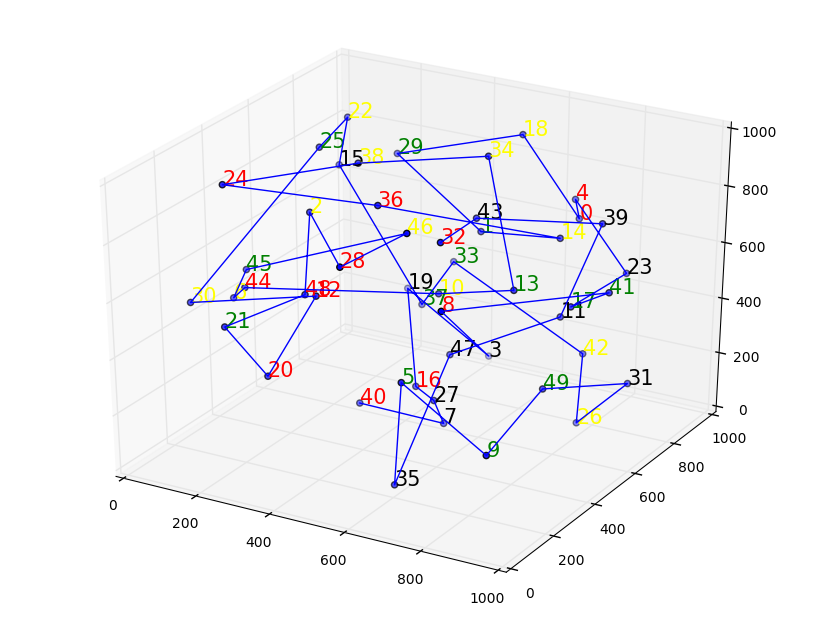

In [494]:
fig = pylab.figure(figsize=(8,6))
ax = Axes3D(fig)

ax.scatter(citiesX, citiesY, citiesZ)
colors = ['red', 'green', 'yellow', 'black']

orderedCitiesX = []
orderedCitiesY = []
orderedCitiesZ = []

for ind in rouBest:
    orderedCitiesX.append(citiesX[ind])
    orderedCitiesY.append(citiesY[ind])
    orderedCitiesZ.append(citiesZ[ind])
    
for i, txt in enumerate(n):
    ax.text(citiesX[i], citiesY[i], citiesZ[i],  '%s' % (str(i)), size=15, zorder=1,  color=colors[i%4])
ax.plot(orderedCitiesX, orderedCitiesY, orderedCitiesZ, color = 'b')
plt.show()

Sljedeća slika prikazuje put dobiven turnirskim odabirom:

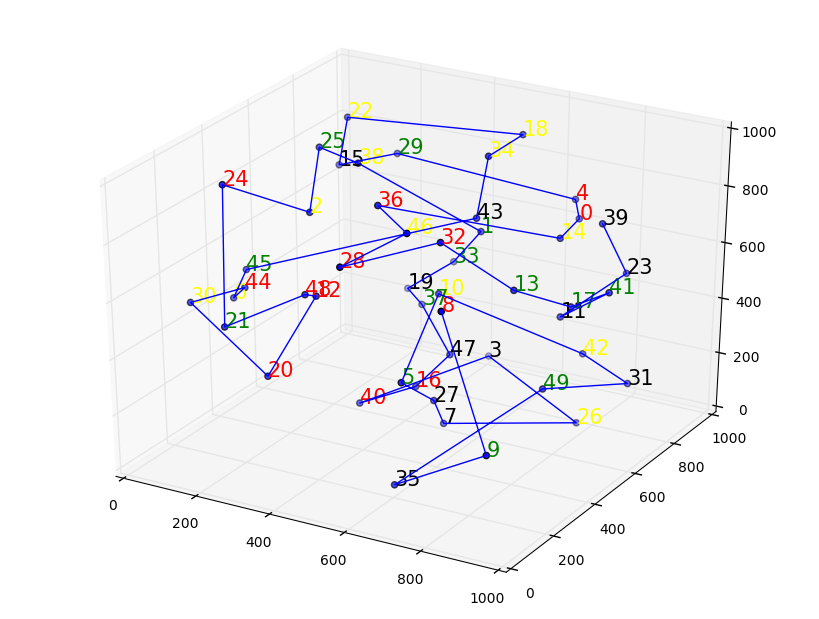

In [495]:
fig = pylab.figure(figsize=(8,6))
ax = Axes3D(fig)

ax.scatter(citiesX, citiesY, citiesZ)
colors = ['red', 'green', 'yellow', 'black']

orderedCitiesX = []
orderedCitiesY = []
orderedCitiesZ = []

for ind in tourBest:
    orderedCitiesX.append(citiesX[ind])
    orderedCitiesY.append(citiesY[ind])
    orderedCitiesZ.append(citiesZ[ind])
    
for i, txt in enumerate(n):
    ax.text(citiesX[i], citiesY[i], citiesZ[i],  '%s' % (str(i)), size=15, zorder=1,  color=colors[i%4])
ax.plot(orderedCitiesX, orderedCitiesY, orderedCitiesZ, color = 'b')
plt.show()

Sljedeća slika predstavlja najbolji put iz početne populacije, očito vrlo dugačak:

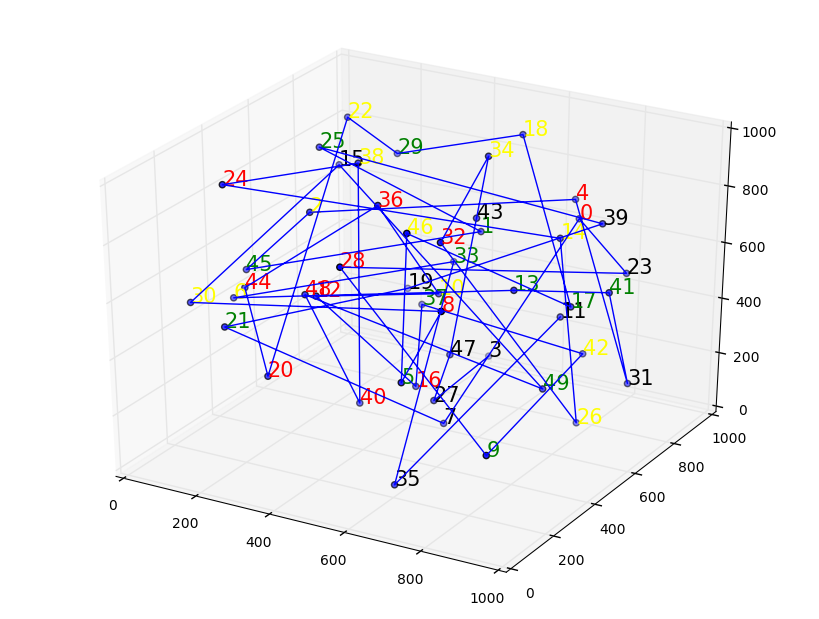

In [496]:
fig = pylab.figure(figsize=(8,6))
ax = Axes3D(fig)

ax.scatter(citiesX, citiesY, citiesZ)
colors = ['red', 'green', 'yellow', 'black']

orderedCitiesX = []
orderedCitiesY = []
orderedCitiesZ = []

for ind in initBest:
    orderedCitiesX.append(citiesX[ind])
    orderedCitiesY.append(citiesY[ind])
    orderedCitiesZ.append(citiesZ[ind])
    
for i, txt in enumerate(n):
    ax.text(citiesX[i], citiesY[i], citiesZ[i],  '%s' % (str(i)), size=15, zorder=1,  color=colors[i%4])
ax.plot(orderedCitiesX, orderedCitiesY, orderedCitiesZ, color = 'b')
plt.show()